http://zacstewart.com/2014/08/05/pipelines-of-featureunions-of-pipelines.html
https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/

The Pipeline is built using a list of (key, value) pairs, where the key is a string containing the name you want to give this step and value is an estimator object:

# Best models 

In [1]:
# The basics
import time
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from random import randint
import seaborn as sns

# Performance metrics
import train_test_lc
from  classify_metrics import *
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Splitting data y model selection
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.feature_selection import SelectKBest,f_classif

# Pipelines
from sklearn.pipeline import Pipeline, FeatureUnion

# Classifiers
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

#Plotting Trees
from IPython.display import Image 
import pydotplus

#Preprocessing:scaling , normalization and dimensional reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA


%matplotlib inline

#resultado en test! y averiguar  curva y conclusiones que hace mas falta
menos texto contruido evidencia de que se necesita mas x ese es el foco
perspectiva del publico poner arbol con datos 

### Load data

In [2]:
data = pd.read_csv("/home/wanda/master_project/Data/spain_balance_data.csv",index_col=0)
print data.shape

(430, 41)


In [75]:
ecua = data[data.network=='regme']
print (ecua.DAY.astype(str)+" "+ecua.YEAR.astype(str)).unique()

['1 2014' '3 2014' '17 2014' '18 2014' '19 2014' '20 2014' '21 2014'
 '22 2014' '23 2014' '24 2014' '25 2014' '26 2014' '27 2014' '41 2014'
 '65 2014' '66 2014' '68 2014' '69 2014' '74 2014' '78 2014' '79 2014'
 '97 2014' '109 2014' '114 2014' '117 2014' '120 2014' '122 2014']


In [76]:
usa = data[data.network=='conus']
print (usa.DAY.astype(str)+" "+usa.YEAR.astype(str)).unique()

['324 2003']


In [3]:
validation_data = pd.read_csv("test_spain.csv",index_col=0)
print validation_data.shape

(35, 41)


In [77]:
esp = validation_data[validation_data.network=='rap']
print (esp.DAY.astype(str)+" "+esp.YEAR.astype(str)).unique()

['38 2015' '106 2015' '120 2015' '173 2015']


['regme' 'conus']
['rap' 'regme']


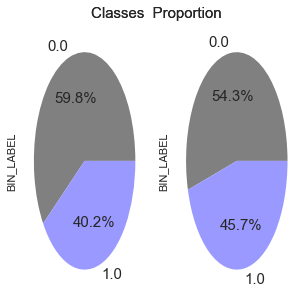

In [4]:
purp = "#b366ff"
blue = "#9999ff"
cool_grey = "#a3a3c2"
other_gray = "#808080"
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.figtext(.5,.9,"Classes  Proportion", fontsize=15, ha='center')
data.BIN_LABEL.value_counts().plot(kind='pie',autopct='%1.1f%%', fontsize=15, colors=[other_gray,blue]) 
plt.subplot(1,2,2)
plt.figtext(.5,.9,"Classes  Proportion", fontsize=15, ha='center')
validation_data.BIN_LABEL.value_counts().plot(kind='pie',autopct='%1.1f%%', fontsize=15, colors=[other_gray,blue]) 
print data.network.unique()
print validation_data.network.unique()

In [5]:
metadata = ['prn','network','STATIONS','PAIRS', 'ID','YEAR', 'DAY','TIME' ]
labels = ['BIN_LABEL' 'LABEL']
columns = ['A_index', 'C_flare', 'K_index', 'N_PAIRS', 'N_STATIONS',
       'kurtosis_delay', 'kurtosis_grad', 'max_elevation', 'max_grad',
       'max_phase_delay', 'mean_code_delay', 'mean_elevation', 'mean_grad',
       'mean_phase_delay', 'min_elevation', 'min_grad', 'min_phase_delay',
       'mse', 'new_regions', 'radio_flux', 'std_grad', 'std_phase',
       'sunsplot_number', 'sunspot_area', 'bucket_grad',
       'bucket_grad_mean', 'k_index_bucket', 'elev_min_bucket',
       'elev_mean_bucket', 'elev_max_bucket', 'grad_elev']

X = data[columns]
X_val = validation_data[columns]

y_bin, y_classes = data.BIN_LABEL, data.LABEL
y_val = validation_data.BIN_LABEL

print "Dataset shape: ",X.shape, " labels",y_bin.shape
print "Validation Dataset (Spain) shape: ",X_val.shape, " labels",y_val.shape

Dataset shape:  (430, 31)  labels (430,)
Validation Dataset (Spain) shape:  (35, 31)  labels (35,)


# Decission Trees

### Using raw data

Metrics 
F1 score:  0.714285714286
F2 score:  0.833333333333
TPR score:  0.9375
PRE score:  0.576923076923
ACC score:  0.657142857143

Confusion Matrix
[[ 8 11]
 [ 1 15]]

True positives:  15 Total positives:  16
True Negatives:  8 Total negatives:  19
False positives:  11
False negatives:  1


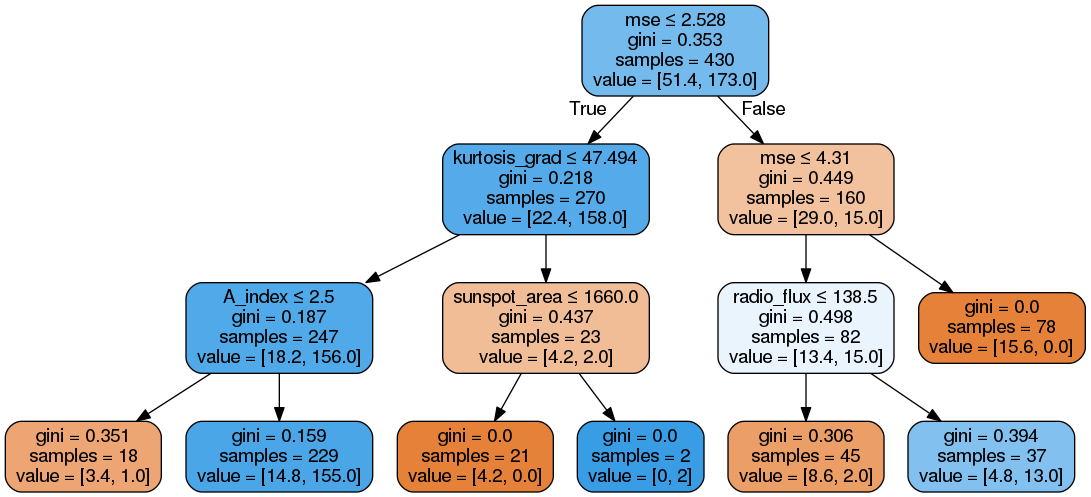

In [29]:
clf = DecisionTreeClassifier(criterion='gini',
                             #min_weight_fraction_leaf=0,
                             class_weight = {0: 0.2, 1: 1.0}, 
                             max_depth=3)
clf.fit(X,y_bin)
y_pred = clf.predict(X_val)
print "Metrics "
print "F1 score: ",f1_score(y_val,y_pred)
print "F2 score: ",fbeta_score(y_val,y_pred,beta=2)
print "TPR score: ",recall_score(y_val,y_pred)
print "PRE score: ",precision_score(y_val,y_pred)
print "ACC score: ",accuracy_score(y_val,y_pred)

print "\nConfusion Matrix" # tn fp / fn tp
cm = confusion_matrix(y_val,y_pred)
print cm
print "\nTrue positives: ",cm[1][1], "Total positives: ",cm[1][1]+cm[1][0]
print "True Negatives: ",cm[0][0], "Total negatives: ",cm[0][0]+cm[0][1]
print "False positives: ",cm[0][1]
print "False negatives: ",cm[1][0]

dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,   
                         filled=True, rounded=True,  
                         special_characters=True)  


graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

### Using dimensinal reduction

In [17]:
clf = DecisionTreeClassifier(criterion='gini',
                             class_weight = {0: 0.2, 1: 1.0}, 
                             max_depth=3)
nc = 4

pipeline = Pipeline([
  ('PCA', PCA(n_components=nc)),
  ('classifier', clf)
])


pipeline.fit(X,y_bin)
y_pred = pipeline.predict(X_val)
print "Metrics "
print "F1 score: ",f1_score(y_val,y_pred)
print "F2 score: ",fbeta_score(y_val,y_pred,beta=2)
print "TPR score: ",recall_score(y_val,y_pred)
print "PRE score: ",precision_score(y_val,y_pred)
print "ACC score: ",accuracy_score(y_val,y_pred)

print "\nConfusion Matrix" # tn fp / fn tp
cm = confusion_matrix(y_val,y_pred)
print cm
print "\nTrue positives: ",cm[1][1], "Total positives: ",cm[1][1]+cm[1][0]
print "True Negatives: ",cm[0][0], "Total negatives: ",cm[0][0]+cm[0][1]
print "False positives: ",cm[0][1]
print "False negatives: ",cm[1][0]
#small improvement

Metrics 
F1 score:  0.731707317073
F2 score:  0.842696629213
TPR score:  0.9375
PRE score:  0.6
ACC score:  0.685714285714

Confusion Matrix
[[ 9 10]
 [ 1 15]]

True positives:  15 Total positives:  16
True Negatives:  9 Total negatives:  19
False positives:  10
False negatives:  1


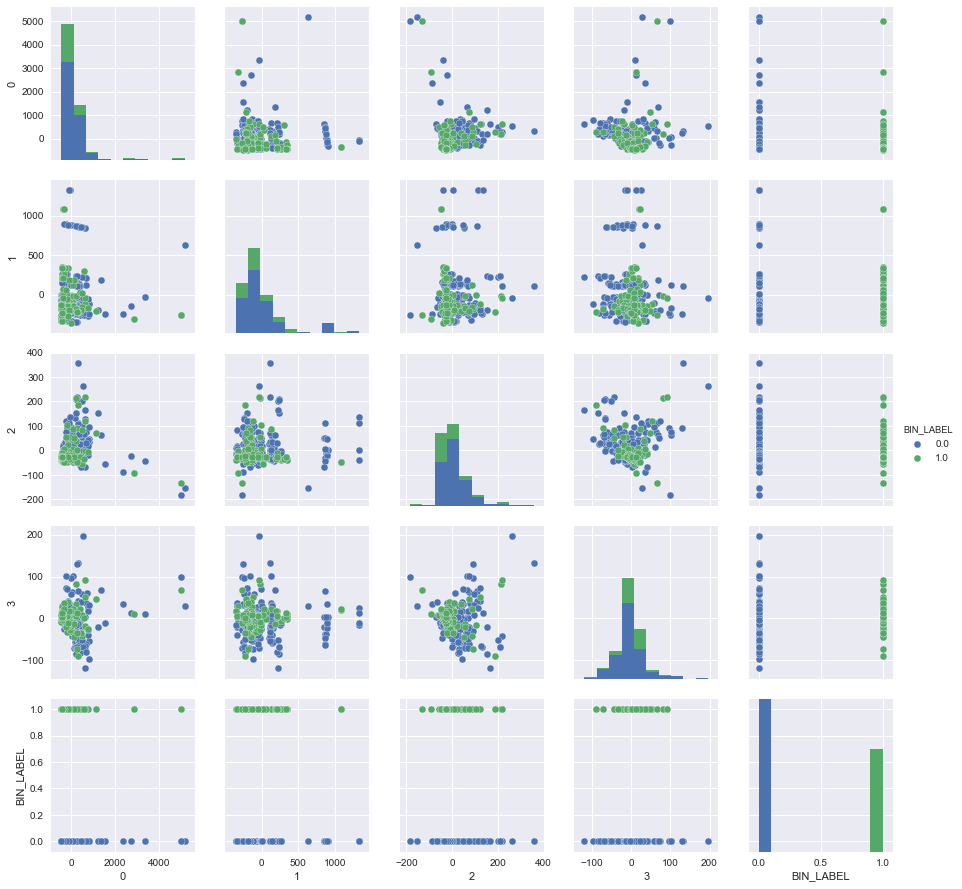

In [16]:
X_pca = PCA(n_components=nc).fit_transform(X)
X_pca.shape

X_PCA = pd.concat([pd.DataFrame(X_pca),pd.DataFrame(y_bin)],axis=1)
sns.pairplot(X_PCA[:-1], hue="BIN_LABEL")

In [18]:
clf = DecisionTreeClassifier(criterion='gini',
                             class_weight = {0: 0.2, 1: 1.0}, 
                             max_depth=3)
pipeline = Pipeline([
  ('ICA', FastICA(n_components=nc)),
  ('classifier', clf)
])


pipeline.fit(X,y_bin)
y_pred = pipeline.predict(X_val)
print "Metrics "
print "F1 score: ",f1_score(y_val,y_pred)
print "F2 score: ",fbeta_score(y_val,y_pred,beta=2)
print "TPR score: ",recall_score(y_val,y_pred)
print "PRE score: ",precision_score(y_val,y_pred)
print "ACC score: ",accuracy_score(y_val,y_pred)

print "\nConfusion Matrix" # tn fp / fn tp
cm = confusion_matrix(y_val,y_pred)
print cm
print "\nTrue positives: ",cm[1][1], "Total positives: ",cm[1][1]+cm[1][0]
print "True Negatives: ",cm[0][0], "Total negatives: ",cm[0][0]+cm[0][1]
print "False positives: ",cm[0][1]
print "False negatives: ",cm[1][0]


Metrics 
F1 score:  0.411764705882
F2 score:  0.426829268293
TPR score:  0.4375
PRE score:  0.388888888889
ACC score:  0.428571428571

Confusion Matrix
[[ 8 11]
 [ 9  7]]

True positives:  7 Total positives:  16
True Negatives:  8 Total negatives:  19
False positives:  11
False negatives:  9


X_ica = FastICA(n_components=nc).fit_transform(X)
X_ica.shape

X_ICA = pd.concat([pd.DataFrame(X_ica),pd.DataFrame(y_bin)],axis=1)
sns.pairplot(X_ICA[:-1], hue="BIN_LABEL")

### Select k best features using Chi2 statistic

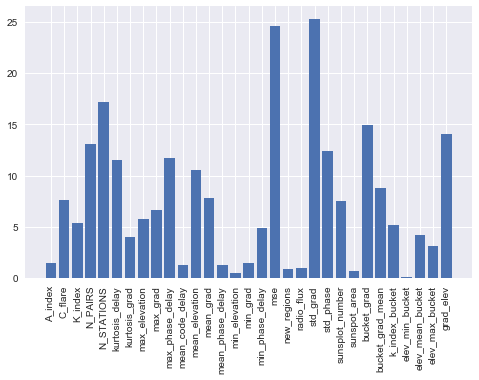

In [22]:
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y_bin)
scores = -np.log10(selector.pvalues_)

plt.figure(figsize=(8,5))
plt.bar(range(len(X.columns)), scores)
plt.xticks(range(len(X.columns)), X.columns, rotation='vertical')
plt.show()

In [32]:
k = 15
kbest_columns = X.columns[np.argsort(scores)[::-1]][:k]
print "        k best features: \n\n",
for i in range(len(kbest_columns)):
    print "#",i+1, kbest_columns[i]
X_best = X[kbest_columns]
X_val_best = X_val[kbest_columns]

        k best features: 

# 1 std_grad
# 2 mse
# 3 N_STATIONS
# 4 bucket_grad
# 5 grad_elev
# 6 N_PAIRS
# 7 std_phase
# 8 max_phase_delay
# 9 kurtosis_delay
# 10 mean_elevation
# 11 bucket_grad_mean
# 12 mean_grad
# 13 C_flare
# 14 sunsplot_number
# 15 max_grad


Metrics 
F1 score:  0.742857142857
F2 score:  0.78313253012
TPR score:  0.8125
PRE score:  0.684210526316
ACC score:  0.742857142857

Confusion Matrix
[[13  6]
 [ 3 13]]

True positives:  13 Total positives:  16
True Negatives:  13 Total negatives:  19
False positives:  6
False negatives:  3


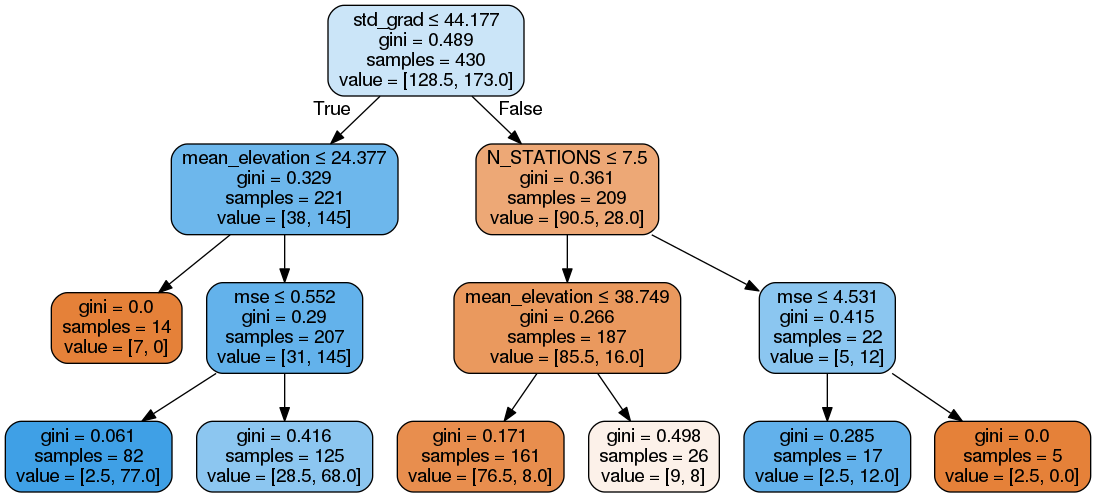

In [40]:
clf = DecisionTreeClassifier(criterion='gini',
                             #class_weight = {0: 0.2, 1: 1.0}, 
                             class_weight = {0: 0.5, 1: 1}, 
                             max_depth=3)
clf.fit(X_best,y_bin)
y_pred = clf.predict(X_val_best)
print "Metrics "
print "F1 score: ",f1_score(y_val,y_pred)
print "F2 score: ",fbeta_score(y_val,y_pred,beta=2)
print "TPR score: ",recall_score(y_val,y_pred)
print "PRE score: ",precision_score(y_val,y_pred)
print "ACC score: ",accuracy_score(y_val,y_pred)

print "\nConfusion Matrix" # tn fp / fn tp
cm = confusion_matrix(y_val,y_pred)
print cm
print "\nTrue positives: ",cm[1][1], "Total positives: ",cm[1][1]+cm[1][0]
print "True Negatives: ",cm[0][0], "Total negatives: ",cm[0][0]+cm[0][1]
print "False positives: ",cm[0][1]
print "False negatives: ",cm[1][0]

dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_best.columns,   
                         filled=True, rounded=True,  
                         special_characters=True)  


graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# Linear Discriminant Analysis

In [53]:
#project data to maximize distance between classes this puts space in one dimention O_O
clf = LinearDiscriminantAnalysis(solver='lsqr')

clf.fit(X,y_bin)
y_pred =clf.predict(X_val)
print "Metrics "
print "F1 score: ",f1_score(y_val,y_pred)
print "F2 score: ",fbeta_score(y_val,y_pred,beta=2)
print "TPR score: ",recall_score(y_val,y_pred)
print "PRE score: ",precision_score(y_val,y_pred)
print "ACC score: ",accuracy_score(y_val,y_pred)

print "\nConfusion Matrix" # tn fp / fn tp
cm = confusion_matrix(y_val,y_pred)
print cm
print "\nTrue positives: ",cm[1][1], "Total positives: ",cm[1][1]+cm[1][0]
print "True Negatives: ",cm[0][0], "Total negatives: ",cm[0][0]+cm[0][1]
print "False positives: ",cm[0][1]
print "False negatives: ",cm[1][0]


Metrics 
F1 score:  0.823529411765
F2 score:  0.853658536585
TPR score:  0.875
PRE score:  0.777777777778
ACC score:  0.828571428571

Confusion Matrix
[[15  4]
 [ 2 14]]

True positives:  14 Total positives:  16
True Negatives:  15 Total negatives:  19
False positives:  4
False negatives:  2


# Logistic Regression


param_solver    lbfgs
param_C           0.1
Name: 1, dtype: object

In [57]:
#project data to maximize distance between classes this puts space in one dimention O_O
clf = LogisticRegression(solver ='lbfgs' ,C=0.1)

clf.fit(X,y_bin)
y_pred =clf.predict(X_val)
print "Metrics "
print "F1 score: ",f1_score(y_val,y_pred)
print "F2 score: ",fbeta_score(y_val,y_pred,beta=2)
print "TPR score: ",recall_score(y_val,y_pred)
print "PRE score: ",precision_score(y_val,y_pred)
print "ACC score: ",accuracy_score(y_val,y_pred)

print "\nConfusion Matrix" # tn fp / fn tp
cm = confusion_matrix(y_val,y_pred)
print cm
print "\nTrue positives: ",cm[1][1], "Total positives: ",cm[1][1]+cm[1][0]
print "True Negatives: ",cm[0][0], "Total negatives: ",cm[0][0]+cm[0][1]
print "False positives: ",cm[0][1]
print "False negatives: ",cm[1][0]


Metrics 
F1 score:  0.75
F2 score:  0.75
TPR score:  0.75
PRE score:  0.75
ACC score:  0.771428571429

Confusion Matrix
[[15  4]
 [ 4 12]]

True positives:  12 Total positives:  16
True Negatives:  15 Total negatives:  19
False positives:  4
False negatives:  4


# Naive Bayes

In [58]:
clf = GaussianNB()
clf.fit(X,y_bin)
y_pred =clf.predict(X_val)
print "Metrics "
print "F1 score: ",f1_score(y_val,y_pred)
print "F2 score: ",fbeta_score(y_val,y_pred,beta=2)
print "TPR score: ",recall_score(y_val,y_pred)
print "PRE score: ",precision_score(y_val,y_pred)
print "ACC score: ",accuracy_score(y_val,y_pred)

print "\nConfusion Matrix" # tn fp / fn tp
cm = confusion_matrix(y_val,y_pred)
print cm
print "\nTrue positives: ",cm[1][1], "Total positives: ",cm[1][1]+cm[1][0]
print "True Negatives: ",cm[0][0], "Total negatives: ",cm[0][0]+cm[0][1]
print "False positives: ",cm[0][1]
print "False negatives: ",cm[1][0]

Metrics 
F1 score:  0.857142857143
F2 score:  0.903614457831
TPR score:  0.9375
PRE score:  0.789473684211
ACC score:  0.857142857143

Confusion Matrix
[[15  4]
 [ 1 15]]

True positives:  15 Total positives:  16
True Negatives:  15 Total negatives:  19
False positives:  4
False negatives:  1


# MLPC Supervised


In [80]:
NN = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.01, batch_size='auto',max_iter= 1000)
pipeline = Pipeline([
    ('Scaler',StandardScaler()),
    ('NeuralNet', NN)
])

pipeline.fit(X,y_bin)
y_pred = pipeline.predict(X_val)
print "Metrics "
print "F1 score: ",f1_score(y_val,y_pred)
print "F2 score: ",fbeta_score(y_val,y_pred,beta=2)
print "TPR score: ",recall_score(y_val,y_pred)
print "PRE score: ",precision_score(y_val,y_pred)
print "ACC score: ",accuracy_score(y_val,y_pred)

print "\nConfusion Matrix" # tn fp / fn tp
cm = confusion_matrix(y_val,y_pred)
print cm
print "\nTrue positives: ",cm[1][1], "Total positives: ",cm[1][1]+cm[1][0]
print "True Negatives: ",cm[0][0], "Total negatives: ",cm[0][0]+cm[0][1]
print "False positives: ",cm[0][1]
print "False negatives: ",cm[1][0]

Metrics 
F1 score:  0.8
F2 score:  0.843373493976
TPR score:  0.875
PRE score:  0.736842105263
ACC score:  0.8

Confusion Matrix
[[14  5]
 [ 2 14]]

True positives:  14 Total positives:  16
True Negatives:  14 Total negatives:  19
False positives:  5
False negatives:  2
